In [1]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
from abcpy.core import *
from abcpy.distributions import *
from abcpy.methods import Rejection
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline


In [2]:
def mean(y):
    mu = np.mean(y, axis=1, keepdims=True)
    return mu

def distance(x, y):
    d = np.linalg.norm( np.array(x) - np.array(y), ord=2, axis=0)
    return d


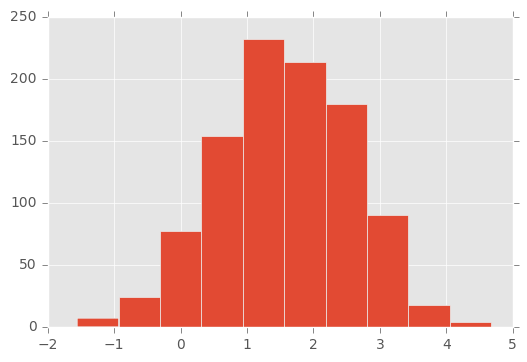

In [3]:
n = 1000
mu = 1.6

# Set up some observed data y
y = mu + np.random.randn(n)

# Plot
plt.hist(y);

In [4]:
# Specify the graphical model
mu = Prior('mu', 'uniform', 0, 4)
Y = Model('Y', 'normal', mu, observed=y)
S1 = Summary('S1', mean, Y)
d = Discrepancy('d', distance, S1)

# Specify the number of simulations and set up rejection sampling
N = 1000000
rej = Rejection(N, d, [mu], 10000)

In [5]:
# Time and run parallel
s = time.time()
mu_post, = rej.infer(0.01)

print("Elapsed time %d sec" % (time.time() - s))
print("Samples: {} ({:.2f}%)".format(len(mu_post), len(mu_post)/N*100))

TypeError: generate() got an unexpected keyword argument 'starting'

In [ ]:
if len(mu_post) > 0:
    print("Posterior for $\mu$")
    plt.hist(mu_post, bins=20)
else:
    print("No accepted samples")